In [44]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import AutoMinorLocator
import datetime as dt
import numpy as np
import gc

In [45]:
df = pd.read_csv('user_movie_view.csv')
del df["userId"]
df2 = pd.read_csv('tags.csv')
del df2['timestampForTag']
del df2['userId']
df2.drop(df2[df2['tag'] !='summer'.casefold()].index, inplace=True)
df2 = df2.movieId.unique()
df2 = pd.DataFrame({'movieId':df2})


In [46]:
df3 = pd.merge(df2,df,on='movieId')
df3['tstamp'] = df3['tstamp'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [47]:
start = df3['tstamp'].min()
end = df3['tstamp'].max()
df4 = pd.DataFrame(columns=['timestamp','number_of_tags'])
delta = dt.timedelta(days=7)
i = 0
e = start
print(start)
print(end)
while start <= end:
    count = 0
    e = start+delta
    for t in df3.tstamp:
        if start<=t<e:
            count +=1
    df4.loc[i] = [start,count]
    i+=1
    start = e

2006-12-02 13:19:29
2020-06-22 02:03:43


In [48]:
df4['number_of_tags'] = df4['number_of_tags'].astype(float)

In [49]:
df4['rolling_avg'] = df4['number_of_tags'].rolling(window=4).mean()
df4.head()

,timestamp,number_of_tags,rolling_avg
0,2006-12-02 13:19:29,20.0,NaN
1,2006-12-09 13:19:29,16.0,NaN
2,2006-12-16 13:19:29,11.0,NaN
3,2006-12-23 13:19:29,19.0,16.5
4,2006-12-30 13:19:29,20.0,16.5


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
import matplotlib.dates as mdate
fig.set_size_inches(15,8)

# Major ticks every 20, minor ticks every 5
ax.xaxis_date()
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

# And a corresponding grid
plt.grid(which='major')

#adding minor ticks
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(12))
#ax.xaxis.set_minor_formatter(matplotlib.ticker.ScalarFormatter(useMathText=True))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

plt.plot(df4['timestamp'], df4['number_of_tags'],label='NoOfTags')
plt.plot(df4['timestamp'], df4['rolling_avg'],label='RollingAvg')

plt.legend()
plt.savefig('tag_to_weekly_graph(pg_view).pdf')

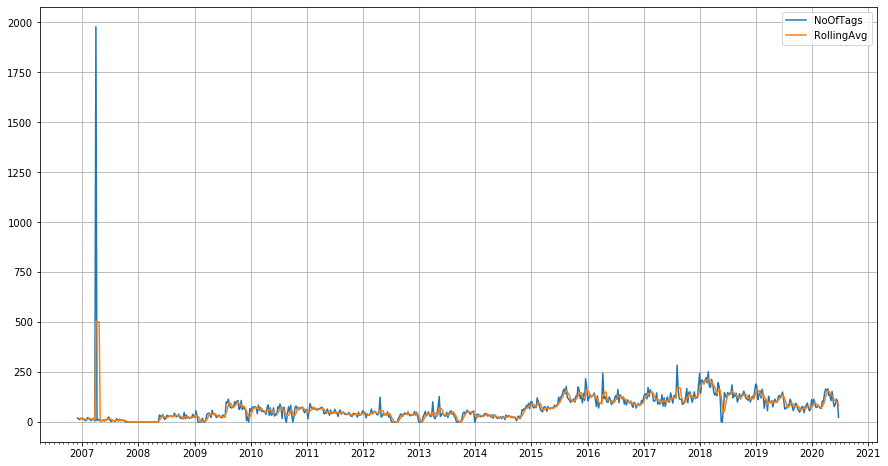